In [1]:
import warnings; 
warnings.simplefilter('ignore')

# Import
## Total Cases

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
coronaURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df=pd.read_csv(coronaURL)

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12581,12614,12641,12641,12712,12771,12805,12805,12874,12917
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23549,23697,23841,23951,24122,24300,24389,24518,24661,24883


In [5]:
index = df[df["Country/Region"]=="Germany"].index.values
df = df.iloc[index]

# Formatting in right structure

In [6]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
133,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,3024604,3054025,3085142,3110252,3134108,3154305,3155522,3167137,3198534,3222888


In [7]:
df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)

In [8]:
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
133,0,0,0,0,0,1,4,4,4,5,...,3024604,3054025,3085142,3110252,3134108,3154305,3155522,3167137,3198534,3222888


In [9]:
date = []
data = []
for (columnDate, columnData) in df.iteritems():
    date.append(columnDate)
    data.append(columnData.values[0])
d = {'y': data, 'ds': date}
formatDf = pd.DataFrame(data=d)
print(formatDf)

           y       ds
0          0  1/22/20
1          0  1/23/20
2          0  1/24/20
3          0  1/25/20
4          0  1/26/20
..       ...      ...
451  3154305  4/17/21
452  3155522  4/18/21
453  3167137  4/19/21
454  3198534  4/20/21
455  3222888  4/21/21

[456 rows x 2 columns]


In [10]:
formatDf['Year'] =    str(20) + formatDf['ds'].apply(lambda x: str(x).split('/')[2])
formatDf['Month'] = formatDf['ds'].apply(lambda x: str(x).split('/')[0])
formatDf['Day'] =  formatDf['ds'].apply(lambda x: str(x).split('/')[1])
formatDf['ds'] = pd.DatetimeIndex(formatDf['Year']+'-'+formatDf['Month']+'-'+formatDf['Day'])
#full_table['Date'] = pd.to_datetime(full_table['Date'])
#Better Version

In [11]:
formatDf.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [12]:
formatDf

,y,ds
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26
...,...,...
451,3154305,2021-04-17
452,3155522,2021-04-18
453,3167137,2021-04-19
454,3198534,2021-04-20


# Train the Model

In [13]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
#, changepoints=str(formatDf['ds'].iloc[-1]).split(' ')[0]
model = m.fit(formatDf)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
461,2021-04-27,3.155154e+06,3.096881e+06,3.200355e+06,3.147294e+06,3.163532e+06,-4328.133043,-4328.133043,-4328.133043,-1976.434194,-1976.434194,-1976.434194,-2351.698848,-2351.698848,-2351.698848,0.0,0.0,0.0,3.150826e+06
462,2021-04-28,3.166425e+06,3.114014e+06,3.213609e+06,3.155157e+06,3.177344e+06,-701.487176,-701.487176,-701.487176,-1976.434194,-1976.434194,-1976.434194,1274.947018,1274.947018,1274.947018,0.0,0.0,0.0,3.165723e+06
463,2021-04-29,3.177696e+06,3.129899e+06,3.230075e+06,3.163699e+06,3.191728e+06,-348.222575,-348.222575,-348.222575,-1976.434194,-1976.434194,-1976.434194,1628.211619,1628.211619,1628.211619,0.0,0.0,0.0,3.177348e+06
464,2021-04-30,3.188967e+06,3.133295e+06,3.240268e+06,3.172144e+06,3.205642e+06,508.874337,508.874337,508.874337,-1976.434194,-1976.434194,-1976.434194,2485.308531,2485.308531,2485.308531,0.0,0.0,0.0,3.189476e+06
465,2021-05-01,3.200238e+06,3.146513e+06,3.252922e+06,3.180781e+06,3.219565e+06,60.303778,60.303778,60.303778,-1976.434194,-1976.434194,-1976.434194,2036.737972,2036.737972,2036.737972,0.0,0.0,0.0,3.200298e+06


# Plotting the Result

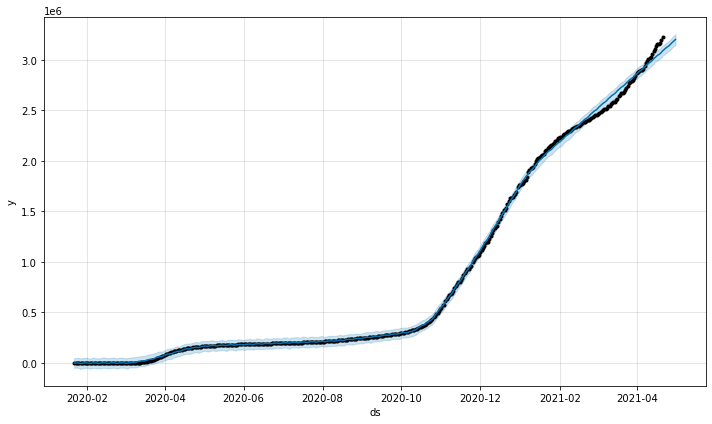

In [15]:
plot1 = m.plot(forecast)

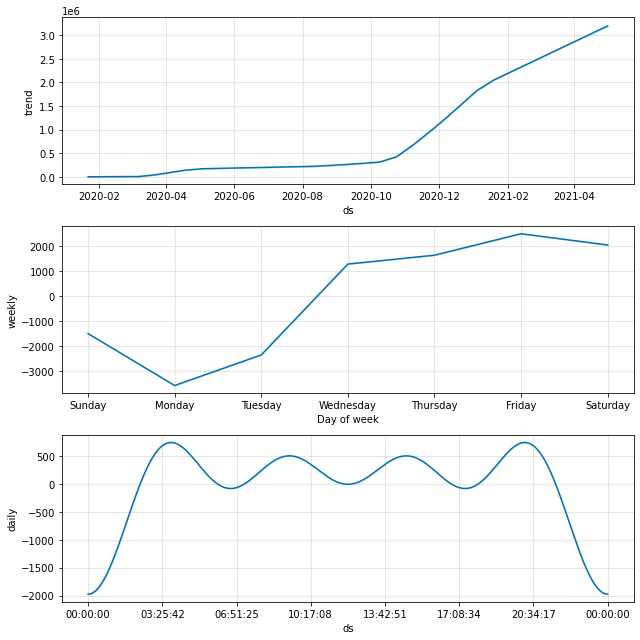

In [16]:
plt2 = m.plot_components(forecast)